In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.inception_v3 import InceptionV3
from skimage.transform import resize

from keras.models import Model, load_model
from keras import models,layers
from keras.optimizers import RMSprop

In [2]:
#사전 학습된 모델 가져오는거
pre_trained_model = InceptionV3(input_shape=(75,75,3),
                                include_top=False,
                                weights='imagenet'
                                )

87910968/87910968 [==============================] - 7s 0us/step


In [3]:
#학습이미지와 학습 이미지의 라벨링 그리고 테스트 이미지와 테스트 이미지의 라벨링 데이터를 가져와 저장합니다
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
#데이터 전처리 진행합니다
#학습 800개 , 검증 200개 사용하여 과제에서 제시한 1000개만 이용하면 이라는 조건 달성하였습니다!
x_train, x_test=x_train[:800] / 255.0 , x_test[:200]/255.0
y_train,y_test=y_train[:800],y_test[:200]


In [5]:
#inceptionV3에서는 최소 입력 이미지 크기가 75x75 라서 이렇게 전처리 과정을 진행하였습니다
#먼저 학습 데이터 바꿔주고
x_train_preprocess=np.zeros((x_train.shape[0],75,75,3),dtype=np.float32)

print(x_train_preprocess.shape)

for i, img in enumerate(x_train):
  img_resize=resize(img,(75,75),anti_aliasing=True)
  x_train_preprocess[i]=np.dstack([img_resize,img_resize,img_resize])

(800, 75, 75, 3)


In [6]:
#검증 데이터들도 바꿔주고
x_test_preprocess=np.zeros((x_test.shape[0],75,75,3),dtype=np.float32)

print(x_test_preprocess.shape)

for i, img in enumerate(x_test):
  img_resize=resize(img,(75,75),anti_aliasing=True)
  x_test_preprocess[i]=np.dstack([img_resize,img_resize,img_resize])

(200, 75, 75, 3)


In [7]:
pre_trained_model=InceptionV3(input_shape=(75,75,3),
                              include_top=False,
                              weights=None)

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_94 (Conv2D)             (None, 37, 37, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 37, 37, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_94 (Activation)     (None, 37, 37, 32)   0           ['batch_normalization_

In [16]:
#mixed9까지만 사용해봤습니다!
last_layer=pre_trained_model.get_layer('mixed9')
last_output=last_layer.output

x=layers.Flatten()(last_output)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dense(10,activation='sigmoid')(x)

In [17]:
model=Model(pre_trained_model.input,x)

model.compile(optimizer=RMSprop(lr=0.001),
                                loss='sparse_categorical_crossentropy',
                                metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [18]:
history=model.fit(x_train_preprocess,y_train,epochs=20,validation_data=(x_test_preprocess,y_test))

Epoch 1/20
25/25 [==============================] - 12s 99ms/step - loss: 0.4410 - accuracy: 0.8988 - val_loss: 36.5001 - val_accuracy: 0.3300
Epoch 2/20
25/25 [==============================] - 1s 50ms/step - loss: 0.1352 - accuracy: 0.9762 - val_loss: 0.4692 - val_accuracy: 0.9100
Epoch 3/20
25/25 [==============================] - 1s 50ms/step - loss: 0.0948 - accuracy: 0.9700 - val_loss: 0.8629 - val_accuracy: 0.8550
Epoch 4/20
25/25 [==============================] - 1s 50ms/step - loss: 0.0920 - accuracy: 0.9775 - val_loss: 1.0492 - val_accuracy: 0.9250
Epoch 5/20
25/25 [==============================] - 1s 53ms/step - loss: 0.1782 - accuracy: 0.9712 - val_loss: 1.0735 - val_accuracy: 0.9000
Epoch 6/20
25/25 [==============================] - 1s 53ms/step - loss: 0.2124 - accuracy: 0.9737 - val_loss: 1.2768 - val_accuracy: 0.8350
Epoch 7/20
25/25 [==============================] - 1s 52ms/step - loss: 0.1541 - accuracy: 0.9737 - val_loss: 3.1517 - val_accuracy: 0.7850
Epoch 8/20


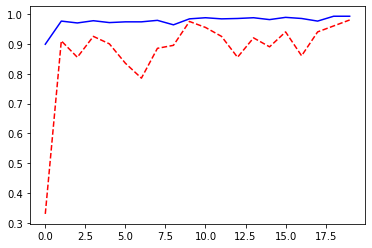

In [19]:
#정확도
plt.plot(history.history['accuracy'],'b-')
plt.plot(history.history['val_accuracy'],'r--')

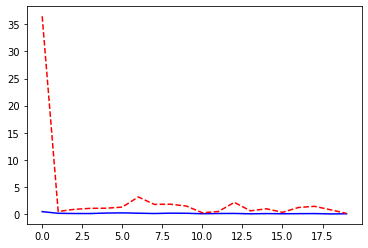

In [20]:
#LOSS율
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'],'r--')